In [30]:
import torch
import torch.nn as nn



In [31]:
N = 1000
D_in = 1
D_out = 1
hidden_size = 128  # Increase from 1 to 64 neurons

relu = nn.ReLU()

X = torch.randn(N, D_in)
true_w1 = torch.tensor([[-3.0]])
true_w2 = torch.tensor([[2.0]])
true_b = torch.tensor(1.3)
y_true = (X**2) @ true_w1 + X @ true_w2 + true_b + torch.randn(N, D_out) * 0.01

learning_rate, epochs = 0.01, 100
losses = []
# Layer 1: input -> hidden (1 -> 64)
W1 = torch.randn((D_in, hidden_size), requires_grad=True)
b1 = torch.randn(hidden_size, requires_grad=True)

# Layer 2: hidden -> output (64 -> 1)
W2 = torch.randn((hidden_size, D_out), requires_grad=True)
b2 = torch.randn(D_out, requires_grad=True)

for epoch in range(epochs):
    # Forward pass
    z1 = X @ W1 + b1                    # (10, 64)
    a = relu(z1)                        # (10, 64)
    z2 = a @ W2 + b2                    # (10, 1)
    
    loss = torch.mean((z2 - y_true) ** 2)
    losses.append(loss.item())
    # Backward pass
    loss.backward()
    
    # Update parameters
    with torch.no_grad():
        W1 -= learning_rate * W1.grad
        W2 -= learning_rate * W2.grad
        b1 -= learning_rate * b1.grad
        b2 -= learning_rate * b2.grad
    
    # Zero gradients
    W1.grad.zero_()
    W2.grad.zero_()
    b1.grad.zero_()
    b2.grad.zero_()
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

Epoch 0: Loss = 262.4542


In [ ]:
class Layer:
    def __init__(self,D_in,D_out,activation_type="None"):
        self.D_in = D_in
        self.D_out = D_out
        self.W = torch.randn((self.D_in,self.D_out))
        self.b = torch.randn(D_out)
        self.activation_type = activation_type
        if self.activation_type == "relu": 
            self.activation = torch.nn.ReLU()
    def forward(self,X):
        z = X@self.W + self.b
        a = self.activation(z)
        return a

class Network:
    def __init__(self,hidden_layer,hidden_size,in_dim,out_dim,hidden_activation,final_activation):
        self.hidden_layer = hidden_layer
        self.hidden_size = hidden_size
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.hidden_activation = hidden_activation
        self.final_activation = final_activation
    def 
            
            
        

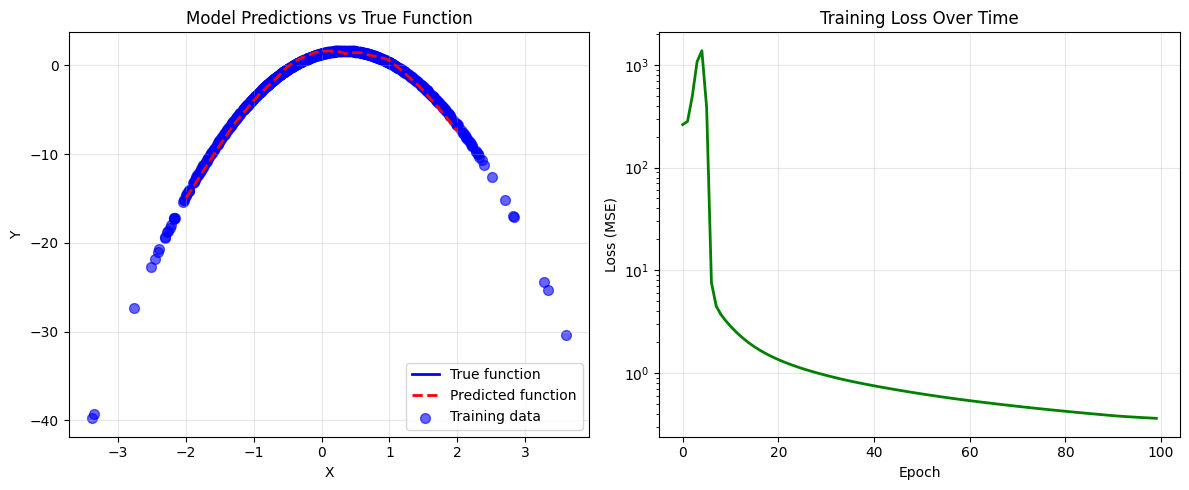

In [32]:
import matplotlib.pyplot as plt

# Generate more test data for smooth curve visualization
X_plot = torch.linspace(-2, 2, 100).reshape(-1, 1)

# Model predictions
z1_plot = X_plot @ W1 + b1
a_plot = relu(z1_plot)
y_pred_plot = a_plot @ W2 + b2

# True values
y_true_plot = (X_plot**2) @ true_w1 + X_plot @ true_w2 + true_b

# Create the plot
plt.figure(figsize=(12, 5))

# Plot 1: Predicted vs True
plt.subplot(1, 2, 1)
plt.plot(X_plot.detach().numpy(), y_true_plot.detach().numpy(), 'b-', linewidth=2, label='True function')
plt.plot(X_plot.detach().numpy(), y_pred_plot.detach().numpy(), 'r--', linewidth=2, label='Predicted function')
plt.scatter(X.detach().numpy(), y_true.detach().numpy(), color='blue', s=50, alpha=0.6, label='Training data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Model Predictions vs True Function')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Training loss over epochs (use stored losses)
plt.subplot(1, 2, 2)
plt.plot(losses, linewidth=2, color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss Over Time')
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.show()